# Holt-Winters Methods

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.dropna(inplace=True)

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency

In [6]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df['Actual'] = df['Thousands of Passengers']
df.head()

,Thousands of Passengers,Actual
Month,,
1949-01-01,112,112
1949-02-01,118,118
1949-03-01,132,132
1949-04-01,129,129
1949-05-01,121,121


<AxesSubplot: xlabel='Month'>

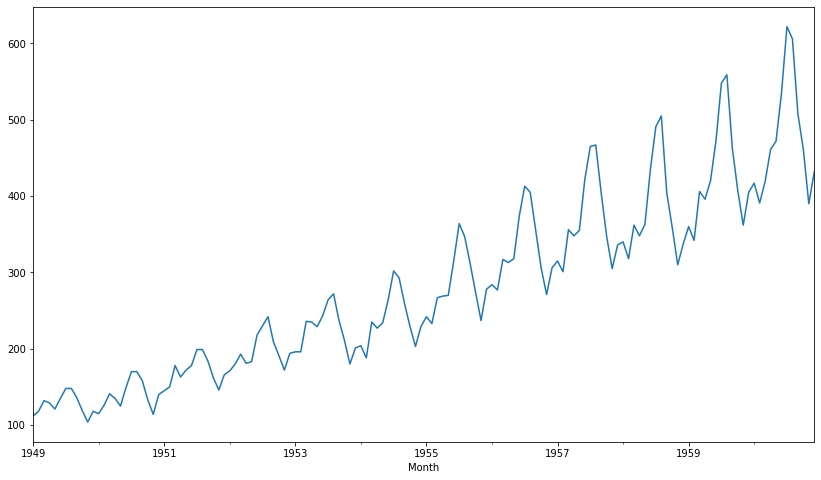

In [8]:
df['Actual'].plot(figsize=(14,8))

___
## Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alpha = 0.15

#df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [10]:
model_ses12=SimpleExpSmoothing(df['Actual'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
df['Simple_Exp'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,Actual,Simple_Exp
Month,,,
1949-01-01,112,112,112.000000
1949-02-01,118,118,112.900000
1949-03-01,132,132,115.765000
1949-04-01,129,129,117.750250
1949-05-01,121,121,118.237712


___
## Double Exponential Smoothing

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(df['Actual'], trend='add')
fitted_model= mod_add12.fit()
df['Double_Exp_Add'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,Actual,Simple_Exp,Double_Exp_Add
Month,,,,
1949-01-01,112,112,112.000000,114.102394
1949-02-01,118,118,112.900000,120.040657
1949-03-01,132,132,115.765000,134.001539
1949-04-01,129,129,117.750250,131.085845
1949-05-01,121,121,118.237712,123.110263


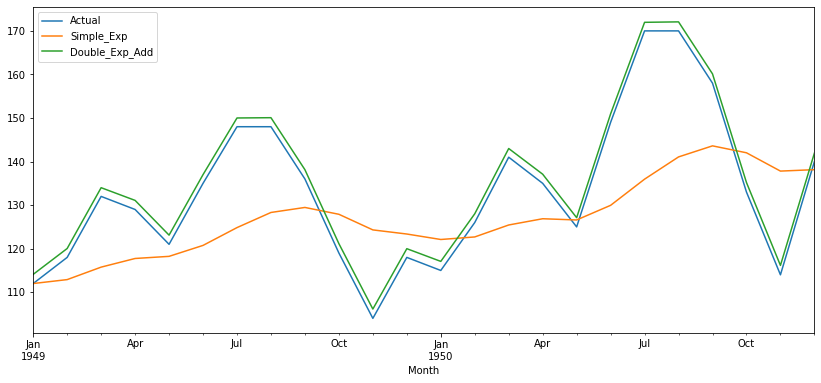

In [12]:
df[['Actual','Simple_Exp','Double_Exp_Add']].iloc[:24].plot(figsize=(14,6)).autoscale(axis='x',tight=True);

In [13]:
df['Double_Exp_Mul'] = ExponentialSmoothing(df['Actual'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,Actual,Simple_Exp,Double_Exp_Add,Double_Exp_Mul
Month,,,,,
1949-01-01,112,112,112.000000,114.102394,113.990701
1949-02-01,118,118,112.900000,120.040657,120.031669
1949-03-01,132,132,115.765000,134.001539,134.235979
1949-04-01,129,129,117.750250,131.085845,131.270786
1949-05-01,121,121,118.237712,123.110263,123.156267


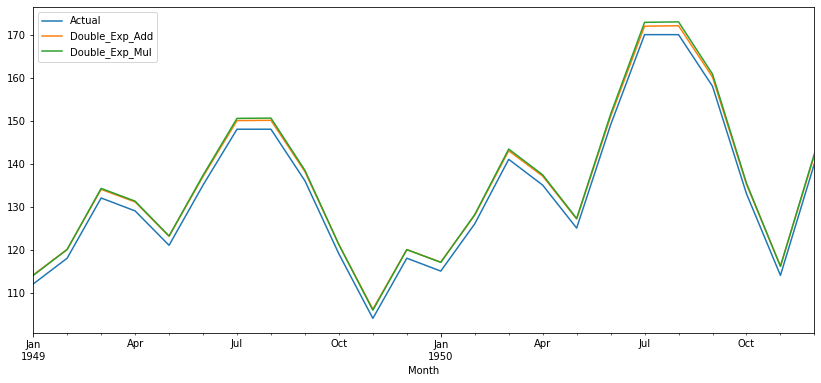

In [14]:
df[['Actual','Double_Exp_Add','Double_Exp_Mul']].iloc[:24].plot(figsize=(14,6)).autoscale(axis='x',tight=True);

___
## Triple Exponential Smoothing

In [15]:
df['Triple_Exp_Add'] = ExponentialSmoothing(df['Actual'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,Actual,Simple_Exp,Double_Exp_Add,Double_Exp_Mul,Triple_Exp_Add
Month,,,,,,
1949-01-01,112,112,112.000000,114.102394,113.990701,111.959998
1949-02-01,118,118,112.900000,120.040657,120.031669,120.193337
1949-03-01,132,132,115.765000,134.001539,134.235979,134.676835
1949-04-01,129,129,117.750250,131.085845,131.270786,131.407263
1949-05-01,121,121,118.237712,123.110263,123.156267,124.643743


In [16]:
df['Triple_Exp_Mul'] = ExponentialSmoothing(df['Actual'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,Actual,Simple_Exp,Double_Exp_Add,Double_Exp_Mul,Triple_Exp_Add,Triple_Exp_Mul
Month,,,,,,,
1949-01-01,112,112,112.000000,114.102394,113.990701,111.959998,111.595648
1949-02-01,118,118,112.900000,120.040657,120.031669,120.193337,118.842606
1949-03-01,132,132,115.765000,134.001539,134.235979,134.676835,133.333853
1949-04-01,129,129,117.750250,131.085845,131.270786,131.407263,127.899963
1949-05-01,121,121,118.237712,123.110263,123.156267,124.643743,120.979016


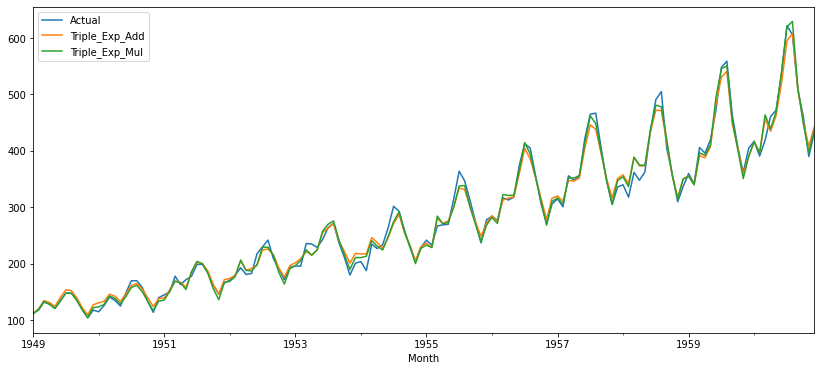

In [17]:
df[['Actual','Triple_Exp_Add','Triple_Exp_Mul']].plot(figsize=(14,6)).autoscale(axis='x',tight=True);

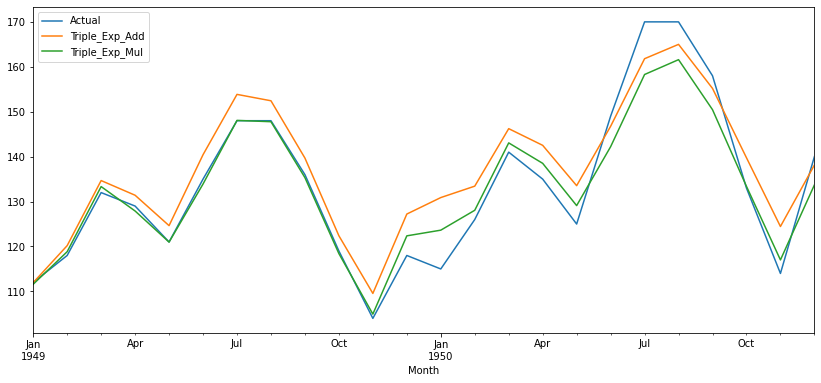

In [18]:
df[['Actual','Triple_Exp_Add','Triple_Exp_Mul']].iloc[:24].plot(figsize=(14,6)).autoscale(axis='x',tight=True);